<a href="https://colab.research.google.com/github/Abhishek08/Machine_Learning/blob/main/Credit_Card_Fraud_Detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation.

Due to confidentiality issues, there are not provided the original features and more background information about the data.

Features V1, V2, ... V28 are the principal components obtained with PCA;
The only features which have not been transformed with PCA are Time and Amount. Feature Time contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature Amount is the transaction Amount, this feature can be used for example-dependant cost-senstive learning.
Feature Class is the response variable and it takes value 1 in case of fraud and 0 otherwise.

### Downloading important Libraries

1. !pip3 install catboost
2. !pip install lightgbm
3. !pip install xgboost


In [1]:
!pip3 install catboost
!pip install lightgbm
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.3 MB/s eta 0:00:00


### Loading the Important Packages

In [52]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
from matplotlib.pylab import rcParams                               # Backend used for rendering and GUI integration
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import plotly.graph_objs as go                                      # Dash is the best way to build analytical apps in Python using Plotly figures.
import plotly.figure_factory as ff                                  # Dash is the best way to build analytical apps in Python using Plotly figures.
from plotly import tools                                            # Dash is the best way to build analytical apps in Python using Plotly figures.
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

#-------------------------------------------------------------------------------------------------------------------------------
import gc                                                           # GC is Garbage collector, removed unused reference from the code
from datetime import datetime
from sklearn.model_selection import train_test_split                # Divide the data into the train and test
from sklearn.model_selection import KFold                           # Cross Validation technique
from sklearn.metrics import roc_auc_score                           # To Check the Model Accuracy
from sklearn.ensemble import RandomForestClassifier                 # Model for Classification Dataset
from sklearn.ensemble import AdaBoostClassifier                     # Model Belongs to Boosting algo to Provide more accuracuy contain Stum
from catboost import CatBoostClassifier                             # Boosting Library belonds to Ensable techniuq
from sklearn import svm                                             # Model for predication {Support vector Machine}
import lightgbm as lgb                                              # Model that used to perform Predication belogs to ensable Boosting
from lightgbm import LGBMClassifier                                 # Model that used to perform Predication belogs to ensable Boosting
import xgboost as xgb                                               # Model that used to perform Predication belogs to ensable Boosting

#-------------------------------------------------------------------------------------------------------------------------------
from imblearn.over_sampling import SMOTE                            # To handle class imbalance problem

from sklearn.metrics import precision_recall_curve, f1_score        # For precision and recall metric estimation
from sklearn.metrics import classification_report, accuracy_score   # To generate complete report of evaluation metrics
from sklearn.metrics import confusion_matrix                        # To plot confusion matrix

In [3]:
# Load the data set

df = pd.read_csv('/content/creditcard.csv')

Display the first 5 record of the data set

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.35981,-0.07278,2.53635,1.37816,-0.33832,0.46239,0.23960,0.09870,0.36379,0.09079,-0.55160,-0.61780,-0.99139,-0.31117,1.46818,-0.47040,0.20797,0.02579,0.40399,0.25141,-0.01831,0.27784,-0.11047,0.06693,0.12854,-0.18911,0.13356,-0.02105,149.62000,0.00000
1,0,1.19186,0.26615,0.16648,0.44815,0.06002,-0.08236,-0.07880,0.08510,-0.25543,-0.16697,1.61273,1.06524,0.48910,-0.14377,0.63556,0.46392,-0.11480,-0.18336,-0.14578,-0.06908,-0.22578,-0.63867,0.10129,-0.33985,0.16717,0.12589,-0.00898,0.01472,2.69000,0.00000
2,1,-1.35835,-1.34016,1.77321,0.37978,-0.50320,1.80050,0.79146,0.24768,-1.51465,0.20764,0.62450,0.06608,0.71729,-0.16595,2.34586,-2.89008,1.10997,-0.12136,-2.26186,0.52498,0.24800,0.77168,0.90941,-0.68928,-0.32764,-0.13910,-0.05535,-0.05975,378.66000,0.00000
3,1,-0.96627,-0.18523,1.79299,-0.86329,-0.01031,1.24720,0.23761,0.37744,-1.38702,-0.05495,-0.22649,0.17823,0.50776,-0.28792,-0.63142,-1.05965,-0.68409,1.96578,-1.23262,-0.20804,-0.10830,0.00527,-0.19032,-1.17558,0.64738,-0.22193,0.06272,0.06146,123.50000,0.00000
4,2,-1.15823,0.87774,1.54872,0.40303,-0.40719,0.09592,0.59294,-0.27053,0.81774,0.75307,-0.82284,0.53820,1.34585,-1.11967,0.17512,-0.45145,-0.23703,-0.03819,0.80349,0.40854,-0.00943,0.79828,-0.13746,0.14127,-0.20601,0.50229,0.21942,0.21515,69.99000,0.00000


In [5]:
print('Shape of the dataset of Credit card {}'.format(df.shape))

Shape of the dataset of Credit card (7973, 31)


In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,7973.00000,7973.00000,7973.00000,7973.00000,7973.00000,7973.00000,7973.00000,7973.00000,7973.00000,7973.00000,7973.00000,7973.00000,7973.00000,7973.00000,7973.00000,7972.00000,7972.00000,7972.00000,7972.00000,7972.00000,7972.00000,7972.00000,7972.00000,7972.00000,7972.00000,7972.00000,7972.00000,7972.00000,7972.00000,7972.00000,7972.00000
mean,4257.15126,-0.29974,0.29523,0.89935,0.21574,-0.02528,0.15729,-0.02645,-0.07052,0.65524,-0.16408,0.63587,-1.02237,0.69056,0.56142,-0.06788,-0.03577,0.27941,-0.06042,-0.05588,0.04311,-0.05372,-0.16580,-0.03517,0.02598,0.08889,0.02026,0.01615,0.00116,65.41354,0.00314
std,3198.96430,1.49834,1.28391,1.09030,1.44706,1.16722,1.32501,1.06371,1.33257,1.15662,1.08448,1.13192,1.51034,1.23819,1.13760,0.98363,0.84176,0.85210,0.79135,0.81136,0.60571,0.95350,0.65486,0.48832,0.60176,0.42751,0.51741,0.40357,0.27598,194.91117,0.05592
min,0.00000,-23.06684,-25.64053,-12.38955,-4.65755,-32.09213,-7.57480,-12.96867,-23.63250,-3.87866,-7.45484,-2.59533,-10.91282,-3.38951,-11.73673,-4.15253,-7.55234,-12.59842,-5.13155,-4.93273,-13.27603,-11.46843,-8.52714,-15.14434,-2.51238,-2.57736,-1.33856,-7.97610,-3.05408,0.00000,0.00000
25%,1531.00000,-1.04636,-0.23736,0.37244,-0.68752,-0.63052,-0.65540,-0.51773,-0.19979,-0.08563,-0.67311,-0.16546,-2.27343,-0.21273,-0.05080,-0.65429,-0.54760,-0.25793,-0.50658,-0.54806,-0.14740,-0.27184,-0.58147,-0.18299,-0.34042,-0.16101,-0.36318,-0.06320,-0.01908,4.61750,0.00000
50%,3635.00000,-0.41634,0.33545,0.94870,0.22338,-0.10734,-0.14867,0.00473,0.01613,0.61317,-0.25863,0.62344,-1.04232,0.71057,0.56512,0.05716,0.02356,0.23796,-0.02731,-0.05184,-0.00734,-0.13034,-0.16705,-0.04611,0.08961,0.11542,-0.01526,0.00710,0.01844,15.95000,0.00000
75%,6662.00000,1.12276,0.95058,1.59795,1.13154,0.40508,0.55520,0.52735,0.30711,1.29409,0.24353,1.41684,0.30331,1.63815,1.40027,0.59630,0.51772,0.75177,0.41673,0.46818,0.17336,0.04482,0.25089,0.08681,0.42102,0.36125,0.32932,0.14470,0.08056,54.91000,0.00000
max,10981.00000,1.68531,8.26175,4.10172,7.38024,11.97427,21.39307,34.30318,3.87766,10.39289,12.25995,7.62009,3.77484,4.46541,5.74873,3.63504,4.08780,6.73938,3.04249,3.09775,8.01257,22.58899,4.53445,13.87622,3.20020,5.52509,3.51735,4.17339,4.86077,7712.43000,1.00000


Below are the some observation


1.   V7 have outlier 120 as we see
2.   v6 and v5 have outlier

Looking to the Time feature, we can confirm that the data contains 284,807 transactions, during 2 consecutive days (or 172792 seconds).

## Checking the missing value

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

As we observed that there is no missing value in the dataset contain.

### Data Unbalanced

<Axes: xlabel='Class', ylabel='count'>

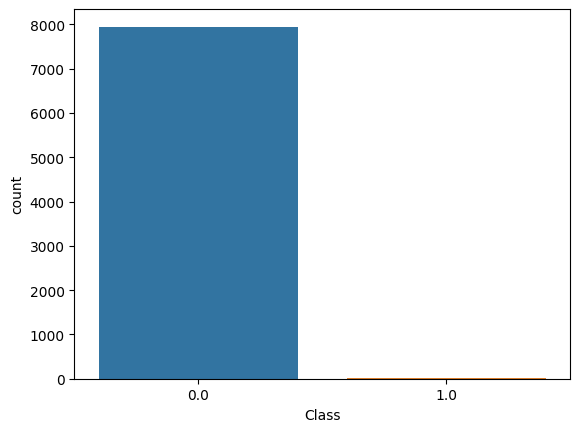

In [8]:
sns.countplot(x = df['Class'], data = df)

As we observed that very few Fraud case identity

In [9]:
(df['Class'].value_counts()[1]/df.shape[0])*100

0.3135582591245453

We can see that 0.17 Percent data is detect as fraud

#### Transactions in time

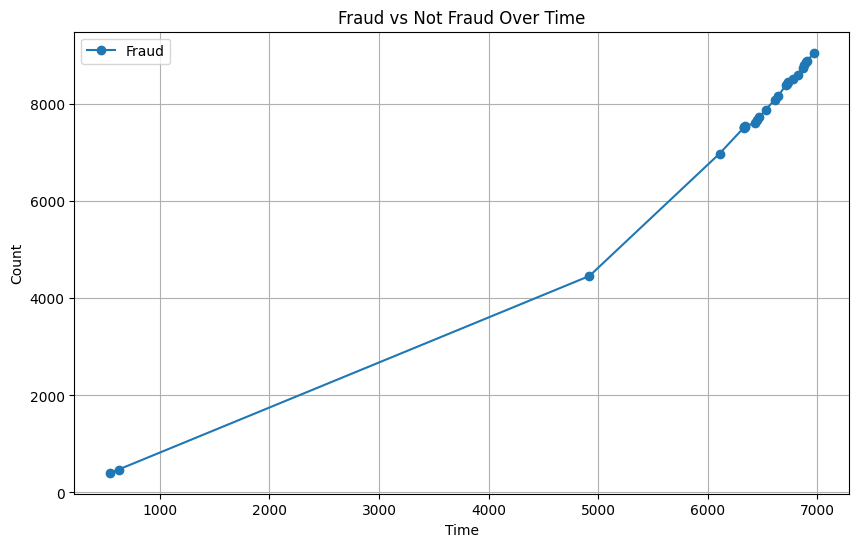

In [10]:
class_0 = df.loc[df['Class'] == 0]['Time']
class_1 = df.loc[df['Class'] == 1]['Time']

hist_data = [class_0,class_1]
group_labels = ['Not Fraud', 'Fraud']

# Plotting
plt.figure(figsize=(10, 6))
#plt.plot(class_0, label='Not Fraud', marker='o')
plt.plot(class_1, label='Fraud', marker='o')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Fraud vs Not Fraud Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
df['Hour'] = df['Time'].apply(lambda x: np.floor(x / 3600))
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
count,7973.00000,7973.00000,7973.00000,7973.00000,7973.00000,7973.00000,7973.00000,7973.00000,7973.00000,7973.00000,7973.00000,7973.00000,7973.00000,7973.00000,7973.00000,7972.00000,7972.00000,7972.00000,7972.00000,7972.00000,7972.00000,7972.00000,7972.00000,7972.00000,7972.00000,7972.00000,7972.00000,7972.00000,7972.00000,7972.00000,7972.00000,7973.00000
mean,4257.15126,-0.29974,0.29523,0.89935,0.21574,-0.02528,0.15729,-0.02645,-0.07052,0.65524,-0.16408,0.63587,-1.02237,0.69056,0.56142,-0.06788,-0.03577,0.27941,-0.06042,-0.05588,0.04311,-0.05372,-0.16580,-0.03517,0.02598,0.08889,0.02026,0.01615,0.00116,65.41354,0.00314,0.75505
std,3198.96430,1.49834,1.28391,1.09030,1.44706,1.16722,1.32501,1.06371,1.33257,1.15662,1.08448,1.13192,1.51034,1.23819,1.13760,0.98363,0.84176,0.85210,0.79135,0.81136,0.60571,0.95350,0.65486,0.48832,0.60176,0.42751,0.51741,0.40357,0.27598,194.91117,0.05592,0.86237
min,0.00000,-23.06684,-25.64053,-12.38955,-4.65755,-32.09213,-7.57480,-12.96867,-23.63250,-3.87866,-7.45484,-2.59533,-10.91282,-3.38951,-11.73673,-4.15253,-7.55234,-12.59842,-5.13155,-4.93273,-13.27603,-11.46843,-8.52714,-15.14434,-2.51238,-2.57736,-1.33856,-7.97610,-3.05408,0.00000,0.00000,0.00000
25%,1531.00000,-1.04636,-0.23736,0.37244,-0.68752,-0.63052,-0.65540,-0.51773,-0.19979,-0.08563,-0.67311,-0.16546,-2.27343,-0.21273,-0.05080,-0.65429,-0.54760,-0.25793,-0.50658,-0.54806,-0.14740,-0.27184,-0.58147,-0.18299,-0.34042,-0.16101,-0.36318,-0.06320,-0.01908,4.61750,0.00000,0.00000
50%,3635.00000,-0.41634,0.33545,0.94870,0.22338,-0.10734,-0.14867,0.00473,0.01613,0.61317,-0.25863,0.62344,-1.04232,0.71057,0.56512,0.05716,0.02356,0.23796,-0.02731,-0.05184,-0.00734,-0.13034,-0.16705,-0.04611,0.08961,0.11542,-0.01526,0.00710,0.01844,15.95000,0.00000,1.00000
75%,6662.00000,1.12276,0.95058,1.59795,1.13154,0.40508,0.55520,0.52735,0.30711,1.29409,0.24353,1.41684,0.30331,1.63815,1.40027,0.59630,0.51772,0.75177,0.41673,0.46818,0.17336,0.04482,0.25089,0.08681,0.42102,0.36125,0.32932,0.14470,0.08056,54.91000,0.00000,1.00000
max,10981.00000,1.68531,8.26175,4.10172,7.38024,11.97427,21.39307,34.30318,3.87766,10.39289,12.25995,7.62009,3.77484,4.46541,5.74873,3.63504,4.08780,6.73938,3.04249,3.09775,8.01257,22.58899,4.53445,13.87622,3.20020,5.52509,3.51735,4.17339,4.86077,7712.43000,1.00000,3.00000


In [12]:
df.groupby(['Hour', 'Class'])['Amount'].aggregate([ 'sum']).reset_index()

,Hour,Class,sum
0,0.00000,0.00000,256572.87000
1,0.00000,1.00000,529.00000
2,1.00000,0.00000,145806.76000
3,1.00000,1.00000,298.93000
4,2.00000,0.00000,106989.39000
5,2.00000,1.00000,1829.78000
6,3.00000,0.00000,9450.01000


In [13]:

tmp = df.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
df_new = pd.DataFrame(tmp)
df_new.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
df_new.head()

,Hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0.00000,0.00000,0.00000,7712.43000,3961,256572.87000,64.77477,12.99000,45615.82120
1,0.00000,1.00000,0.00000,529.00000,2,529.00000,264.50000,264.50000,139920.50000
2,1.00000,0.00000,0.00000,1769.69000,2215,145806.76000,65.82698,22.82000,20053.61577
3,1.00000,1.00000,59.00000,239.93000,2,298.93000,149.46500,149.46500,16367.83245
4,2.00000,0.00000,0.00000,4002.88000,1555,106989.39000,68.80347,17.90000,45355.43044


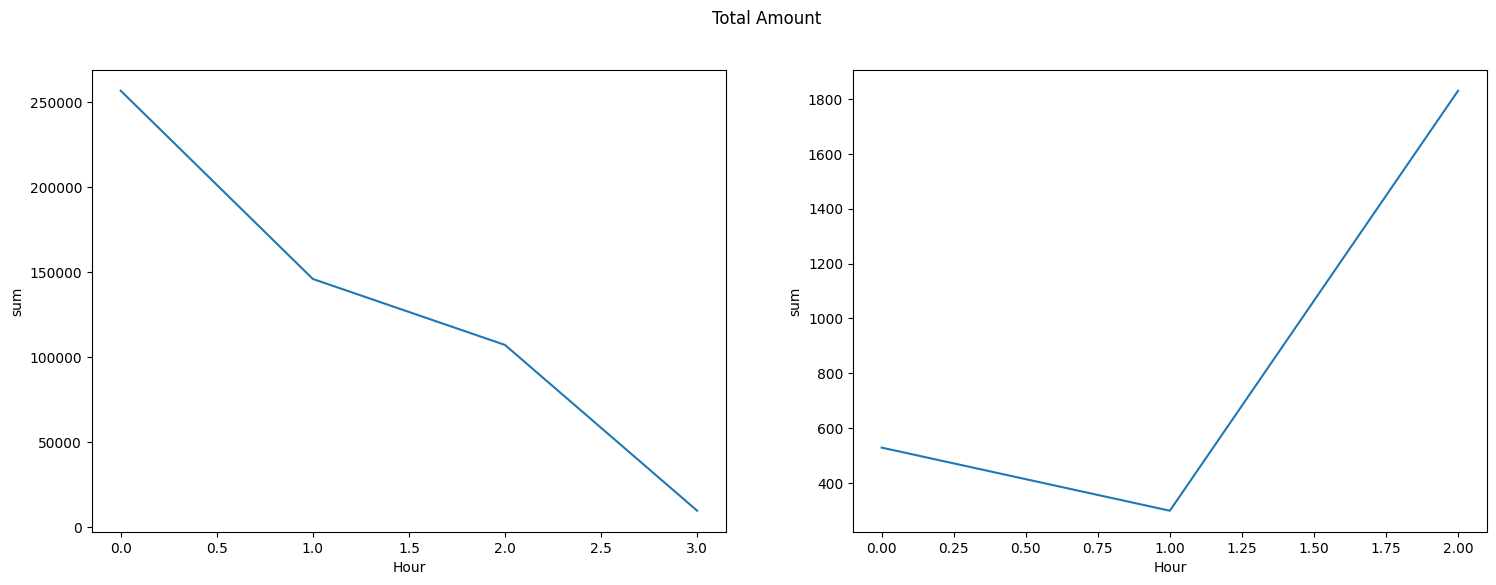

In [14]:
tmp = df.groupby(['Hour', 'Class'])['Amount'].aggregate([ 'sum']).reset_index()
dummy = pd.DataFrame(tmp)

fig,(ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y ='sum', data=dummy.loc[dummy.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y ='sum', data=dummy.loc[dummy.Class==1])
plt.suptitle("Total Amount")
plt.show();

*Display the transcation graph*

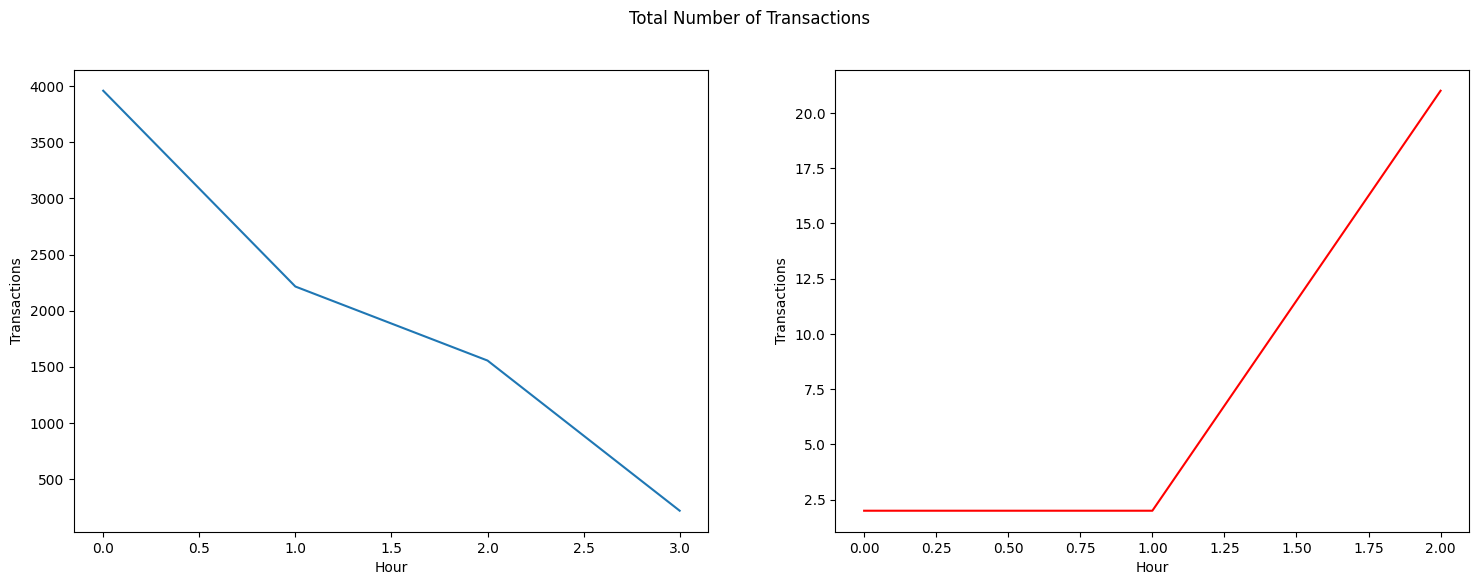

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1 , x = 'Hour', y ='Transactions', data = df_new.loc[df_new.Class==0])
s = sns.lineplot(ax = ax2 ,x = 'Hour' , y = 'Transactions', data = df_new.loc[df_new.Class==1],color="red")
plt.suptitle("Total Number of Transactions")
plt.show();

We can observed that Huge transaction made in the night and most of the transcation range between 10 to 30

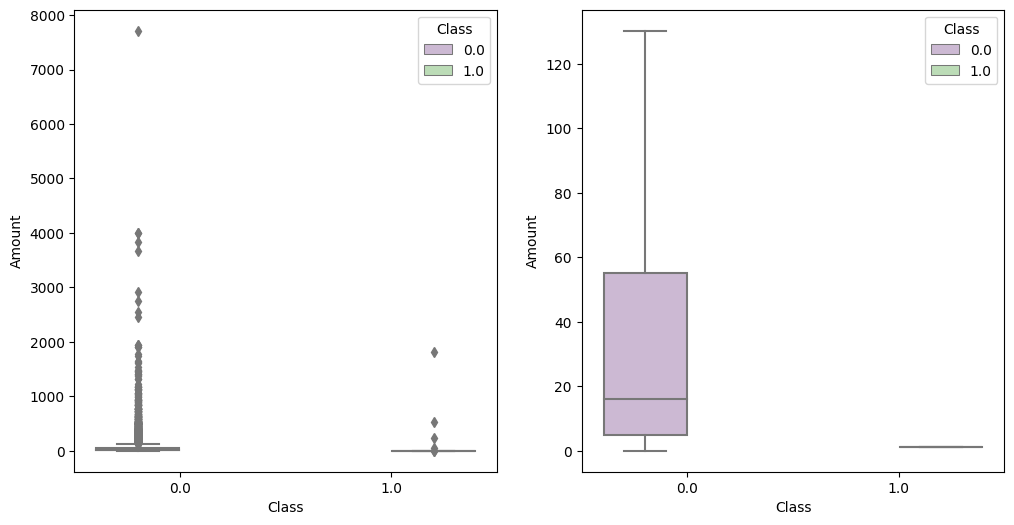

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=False)
plt.show();

In [21]:
temp = df[['Amount','Class']].copy()

class_0 = temp.loc[temp['Class']==0]['Amount']
class_1 = temp.loc[temp['Class']==1]['Amount']

In [22]:
class_0.describe()

count   7947.00000
mean      65.28489
std      194.12655
min        0.00000
25%        4.79500
50%       15.95000
75%       54.99000
max     7712.43000
Name: Amount, dtype: float64

In [23]:
class_1.describe()

count     25.00000
mean     106.30840
std      372.67688
min        0.00000
25%        1.00000
50%        1.00000
75%        1.00000
max     1809.68000
Name: Amount, dtype: float64

# Predictive Model

In [24]:
X = df.drop('Class', axis =1)
y = df['Class']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [27]:
#initialising and choosing the number of neighbours
smote= SMOTE(k_neighbors=5)

In [35]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
Hour      0
dtype: int64

In [31]:
df.dropna(inplace=True)

In [32]:
df.isna().sum(

)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
Hour      0
dtype: int64

In [36]:
X = df.drop('Class', axis =1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [37]:
X_train, y_train = smote.fit_resample(X_train, y_train)
X_test, y_test = smote.fit_resample(X_test, y_test)

<Axes: xlabel='Class', ylabel='count'>

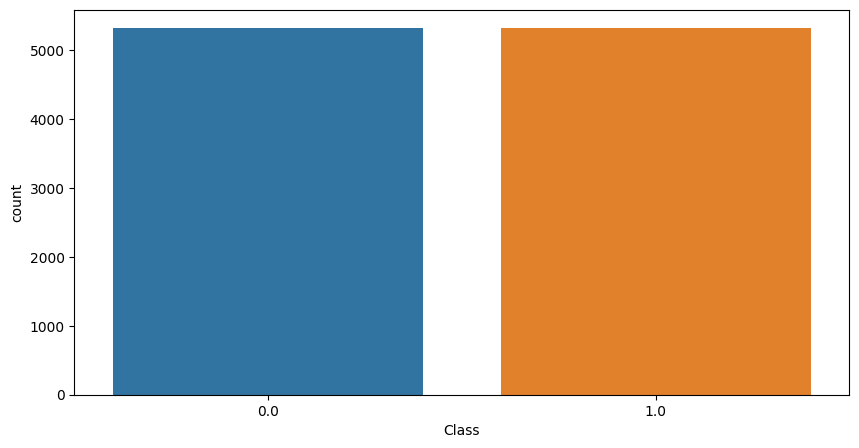

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(x=y_train)

So our model is now balanced Now applying the randow forest

Lets Start with Our First Model RandomForestClassifier


RFC_METRIC = 'gini'  #metric used for RandomForrestClassifier
NUM_ESTIMATORS = 100 #number of estimators used for RandomForrestClassifier
NO_JOBS = 4 #number of parallel jobs used for RandomForrestClassifier


#TRAIN/VALIDATION/TEST SPLIT
#VALIDATION
VALID_SIZE = 0.20 # simple validation using train_test_split
TEST_SIZE = 0.20 # test size using_train_test_split

#CROSS-VALIDATION
NUMBER_KFOLDS = 5 #number of KFolds for cross-validation



RANDOM_STATE = 2018

MAX_ROUNDS = 1000 #lgb iterations
EARLY_STOP = 50 #lgb early stop
OPT_ROUNDS = 1000  #To be adjusted based on best validation rounds
VERBOSE_EVAL = 50 #Print out metric result

IS_LOCAL = False


In [39]:
rmforest = RandomForestClassifier(n_jobs =4 ,
                                  random_state =2018,
                                  criterion ='gini',
                                  n_estimators=100,
                                  verbose=False)

In [41]:
rmforest.fit(X_train,y_train)

RandomForestClassifier(n_jobs=4, random_state=2018, verbose=False)

In [42]:
y_rm_predict = rmforest.predict(X_test)

In [43]:
temp = pd.DataFrame({'Feature':X_train.columns, 'Importance':rmforest.feature_importances_})

In [47]:
temp = temp.sort_values(by = 'Importance')

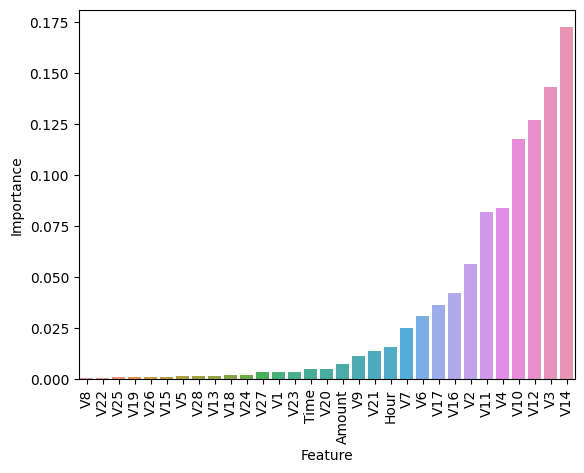

In [50]:
sns.barplot(data =temp, x = 'Feature', y = 'Importance')
plt.xticks(rotation = 90);

Most Important feature are v12, v14, v3, v11 , v7, v16

check the confusion metrics

In [53]:
confusion_matrix(y_test,y_rm_predict)

array([[2625,    0],
       [   0, 2625]])

In [54]:
accuracy_score(y_test,y_rm_predict)

1.0

Its time to test the model without SMOTH library and check the model accuracy

In [56]:
X = df.drop('Class', axis =1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


<Axes: xlabel='Class', ylabel='count'>

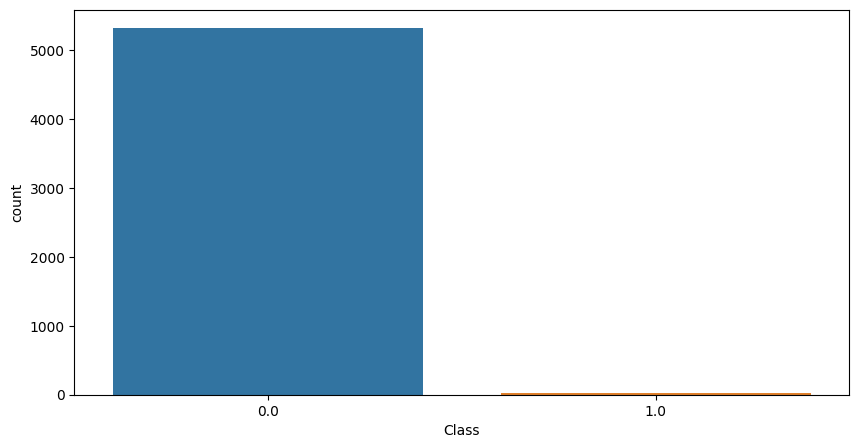

In [61]:
plt.figure(figsize=(10,5))
sns.countplot(x=y_train)

In [62]:
"""
This Function with take the Data and Model and print the accuracy and Confusion Metrics
"""
def model_performance_without_smothLib(X_train, X_test, y_train, y_test, model):
  model.fit(X_train,y_train)
  predicted_value = model.predict(X_test)
  print(accuracy_score(y_test,predicted_value))
  print(confusion_matrix(y_test,predicted_value))
  print(roc_auc_score(y_test,predicted_value))


In [63]:
"""
This Function with take the Data and Model and print the accuracy and Confusion Metrics
"""
def model_performance_with_smothLib(X_train, X_test, y_train, y_test, model):
  smote= SMOTE(k_neighbors=5)
  X_train, y_train = smote.fit_resample(X_train, y_train)
  X_test, y_test = smote.fit_resample(X_test, y_test)
  model.fit(X_train,y_train)
  predicted_value = model.predict(X_test)
  print(accuracy_score(y_test,predicted_value))
  print(confusion_matrix(y_test,predicted_value))
  print(roc_auc_score(y_test,predicted_value))

In [64]:
rmforest = RandomForestClassifier(n_jobs =4 ,
                                  random_state =2018,
                                  criterion ='gini',
                                  n_estimators=100,
                                  verbose=False)

In [65]:
model_performance_without_smothLib(X_train, X_test, y_train, y_test, rmforest)

1.0
[[2625    0]
 [   0    6]]
1.0


In [66]:
model_performance_with_smothLib(X_train, X_test, y_train, y_test, rmforest)

1.0
[[2625    0]
 [   0 2625]]
1.0


Now Testing with Another Model is Adaboost

In [67]:
ada_boost  = AdaBoostClassifier(random_state=2018,
                         algorithm='SAMME.R',
                         learning_rate=0.8,
                             n_estimators=100)

In [68]:
X = df.drop('Class', axis =1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [69]:
model_performance_without_smothLib(X_train, X_test, y_train, y_test,ada_boost)

1.0
[[2625    0]
 [   0    6]]
1.0


In [70]:
ada_boost.feature_importances_

array([0.01, 0.03, 0.  , 0.  , 0.11, 0.03, 0.06, 0.02, 0.  , 0.09, 0.08,
       0.  , 0.12, 0.04, 0.1 , 0.06, 0.03, 0.03, 0.01, 0.02, 0.  , 0.02,
       0.02, 0.01, 0.04, 0.05, 0.01, 0.  , 0.01, 0.  , 0.  ])